In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
class Triangle : 
    def __init__(self,charge, pt1 ,pt2 ,pt3):
        self.pt1 = pt1
        self.pt2 = pt2
        self.pt3 = pt3
        self.points = {pt1,pt2,pt3}
        self.charge = charge
        self.aire = np.linalg.norm(np.cross(np.subtract(pt1,pt3),np.subtract(pt2,pt3)))*0.5
        
    def __add__(t1,t2) : 
        
        intersection = len(t1.points.intersection(t2.points))
        
        if intersection == 2 : 
            return t1.aire + t2.aire
        elif intersection == 3 : 
            return t1.aire
        
        return Exception("Vous ne pouvez pas ajoutez deux triangles qui n'ont pas au moins deux points en commun.")

In [3]:
def remplissage(densite : int, tr : Triangle) -> list : # la densité repésente le nombre de points par unités d'aire 
    nb_pts = densite*tr.aire
    V1,V2 = np.subtract(tr.pt1,tr.pt3),np.subtract(tr.pt2,tr.pt3)
    nb_pts_v1,nb_pts_v2 = 10,10 # j'ai fixé ces deux valeurs mais elle doivent dépendre de nb_pts
    
    s1, s2 = np.linspace(0,np.linalg.norm(V1),nb_pts_v1),np.linspace(0,np.linalg.norm(V2),nb_pts_v2)
    
    return s1[:, np.newaxis] * V1 + s2[:, np.newaxis] * V2,# tr.charge/nb_pts

tr = Triangle(10,(1,0,0),(0,0,0),(0,0,1))
remplissage(30, tr)

(array([[ 0.        ,  0.        , -0.        ],
        [ 0.15713484,  0.        , -0.26824595],
        [ 0.31426968,  0.        , -0.5364919 ],
        [ 0.47140452,  0.        , -0.80473785],
        [ 0.62853936,  0.        , -1.07298381],
        [ 0.7856742 ,  0.        , -1.34122976],
        [ 0.94280904,  0.        , -1.60947571],
        [ 1.09994388,  0.        , -1.87772166],
        [ 1.25707872,  0.        , -2.14596761],
        [ 1.41421356,  0.        , -2.41421356]]),)

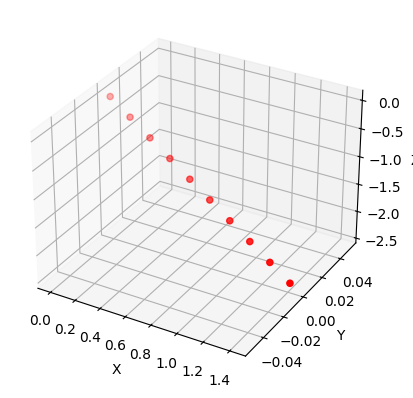

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_points_3d(points):
    # Séparer les coordonnées x, y et z
    x_vals, y_vals, z_vals = points[0][:,0],points[0][:,1],points[0][:,2]
    
    # Créer une figure et un axe 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Afficher les points
    ax.scatter(x_vals, y_vals, z_vals, c='r', marker='o')
    
    # Ajouter des labels aux axes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Afficher le graphique
    plt.show()

# Exemple d'utilisation
points = remplissage(30, tr)
plot_points_3d(points)


In [5]:
def force(point_application : tuple, distribution_points : tuple[list[np.array],float]) -> tuple : 
    # on se place dans le cas d'une distribution de charge uniforme sur toute la surface
    
    k = 1/(4*scipy.constants.pi*scipy.constants.epsilon_0)
    
    F = np.zeros(3, dtype=np.float64)  

    for point in distribution_points[0]: 
        point = np.array(point, dtype=np.float64) 
        U = np.subtract(point_application, point)  
        r = np.linalg.norm(U)  
        if r != 0:  
            F += (np.float64(k * distribution_points[1]) / (r**3)) * U
    
    return F

force(np.array((0,0,0)),(np.array((1,1,1)), 10))

array([-5.18896545e+10, -5.18896545e+10, -5.18896545e+10])

[[-5, -5, -5], [-5, -5, -4], [-5, -5, -3], [-5, -5, -2], [-5, -5, -1], [-5, -5, 0], [-5, -5, 1], [-5, -5, 2], [-5, -5, 3], [-5, -5, 4], [-5, -5, 5], [-5, -4, -5], [-5, -4, -4], [-5, -4, -3], [-5, -4, -2], [-5, -4, -1], [-5, -4, 0], [-5, -4, 1], [-5, -4, 2], [-5, -4, 3], [-5, -4, 4], [-5, -4, 5], [-5, -3, -5], [-5, -3, -4], [-5, -3, -3], [-5, -3, -2], [-5, -3, -1], [-5, -3, 0], [-5, -3, 1], [-5, -3, 2], [-5, -3, 3], [-5, -3, 4], [-5, -3, 5], [-5, -2, -5], [-5, -2, -4], [-5, -2, -3], [-5, -2, -2], [-5, -2, -1], [-5, -2, 0], [-5, -2, 1], [-5, -2, 2], [-5, -2, 3], [-5, -2, 4], [-5, -2, 5], [-5, -1, -5], [-5, -1, -4], [-5, -1, -3], [-5, -1, -2], [-5, -1, -1], [-5, -1, 0], [-5, -1, 1], [-5, -1, 2], [-5, -1, 3], [-5, -1, 4], [-5, -1, 5], [-5, 0, -5], [-5, 0, -4], [-5, 0, -3], [-5, 0, -2], [-5, 0, -1], [-5, 0, 0], [-5, 0, 1], [-5, 0, 2], [-5, 0, 3], [-5, 0, 4], [-5, 0, 5], [-5, 1, -5], [-5, 1, -4], [-5, 1, -3], [-5, 1, -2], [-5, 1, -1], [-5, 1, 0], [-5, 1, 1], [-5, 1, 2], [-5, 1, 3], [-5, 1, 4

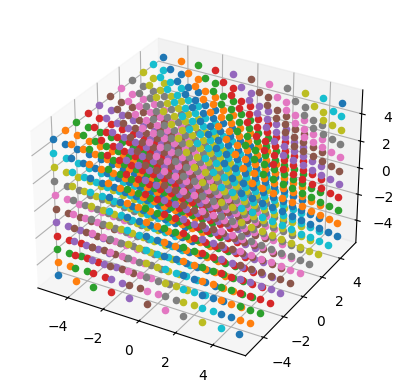

In [13]:
liste_point = []

for x in range(-5,6):
    for y in range(-5,6):
        for z in range(-5,6):
            point = [x,y,z]
            liste_point.append(point)

print(liste_point)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for point in liste_point:
    ax.scatter(point[0],
            point[1],
            point[2])

#méthode brudal 

#pour la génération d'une plaque quelconque -> faire appraître une application qui représente un maillage 2D de la taille de l'espace choisi
#pouvoir cliquer sur chaque point pour le faire apparaître en rouge ce qui représenterait une charge plus ou moins élevées.